## Regressão linear simples e múltipla
A análise de regressão linear estuda a relação entre uma variável dependente e as variáveis independentes. Através dessa análise, é possível identificar e quantificar a relação entre variáveis.

$ y = \ beta_0 + \ beta_1x_1 + \ beta_2x_2 + ... + \ beta_nx_n $

- $ y $ é o desfecho/variável dependente/ variável resposta
- $ \ beta_0 $ é a intercepto
- $ \ beta_1 $ é o coeficiente de $ x_1 $ (a primeira 'variável independente')
- $ \ beta_n $ é o coeficiente de $ x_n $ (a enésima 'variável independente')

Nesse caso: Exemplo dados do convênio médico

$ y = \ beta_0 + \ beta_1 \ . Idade + \ beta_2 \ . Sexo + \ beta_3 \ . Fumante + \ beta_4 \ . IMC $

y = Custo médio do convênio médico. Os valores de $ \ beta $ são chamados de **coeficientes do modelo**.
Esses valores são estimados usando o método de Mínimos quadrados.

In [ ]:
#importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from scipy import stats

# biblioteca para gráficos
import seaborn as sns

# importa o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# permitir que gráficos possam ser impressos dentro do caderno jupyter.
%matplotlib inline


In [ ]:
#Carregar Base de Dados
dados = pd.read_excel('convenio.xlsx')

In [ ]:
#### Estudo das relações das variáveis com o custo médio do convênio
### Explorando informações iniciais
#visualizar cabeçalho dos dados
dados.head()

,fumante,imc,custo,idade,sexo
0,0,34.10,100,0,F
1,0,30.40,102,2,F
2,0,30.14,108,3,F
3,0,33.66,110,3,F
4,0,37.29,112,5,F


In [ ]:
#Visualizar dimensão dos dados (442 obs e 11 variaveis)
dados.shape

(166, 5)

In [ ]:
dados.describe()

,fumante,imc,custo,idade
count,166.000000,166.000000,166.000000,166.000000
mean,0.078313,30.344940,852.204819,48.337349
std,0.269477,5.861088,512.600293,24.490086
min,0.000000,17.400000,100.000000,0.000000
25%,0.000000,26.650000,424.500000,31.500000
50%,0.000000,30.120000,894.500000,54.000000
75%,0.000000,34.100000,1344.000000,63.500000
max,1.000000,53.130000,1668.000000,92.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fumante  166 non-null    int64  
 1   imc      166 non-null    float64
 2   custo    166 non-null    int64  
 3   idade    166 non-null    int64  
 4   sexo     166 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 6.6+ KB


In [ ]:
# Dados faltantes
dados.isnull().sum()

fumante    0
imc        0
custo      0
idade      0
sexo       0
dtype: int64

In [ ]:
#Frequência Absoluta
dados['fumante'].value_counts()

fumante
0    153
1     13
Name: count, dtype: int64

In [ ]:
dados['fumante'].value_counts(normalize=True)

fumante
0    0.921687
1    0.078313
Name: proportion, dtype: float64

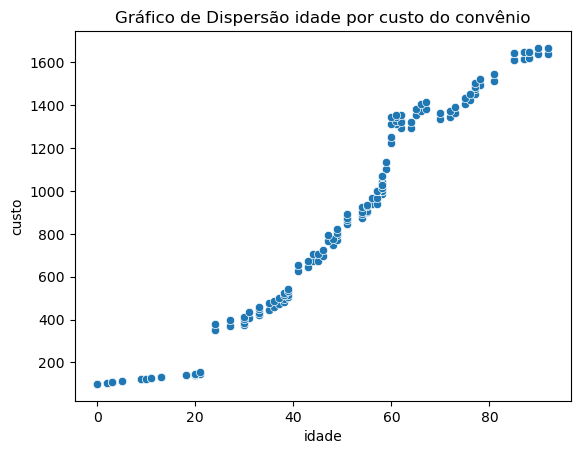

In [ ]:
# Gráfico de dispersão e correlação
sns.scatterplot(x="idade", y="custo",
                data=dados)
plt.title("Gráfico de Dispersão idade por custo do convênio")
plt.show()

<Axes: xlabel='idade', ylabel='custo'>

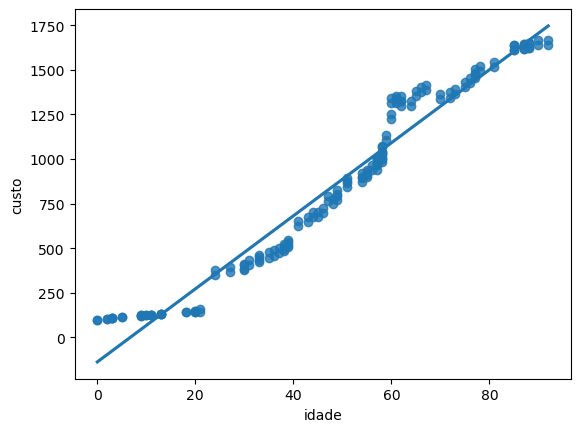

In [ ]:
#Gráfico de dispersão com reta de regressão
sns.regplot(x="idade", y="custo",
                data=dados, ci=None)

In [ ]:
# Selecionando os dados
dados_sel = dados.iloc[:, 1:4]
dados_sel

,imc,custo,idade
0,34.10,100,0
1,30.40,102,2
2,30.14,108,3
3,33.66,110,3
4,37.29,112,5
...,...,...,...
161,27.40,1647,87
162,37.10,1649,88
163,33.10,1649,88
164,33.70,1668,92


In [ ]:
# Calcular a matriz de correlação
cor_matriz = dados_sel.corr()

# Arredondando para duas casas decimais
cor_matriz_arredondada = cor_matriz.round(2)

# Visualizando a matriz de correlação arredondada
cor_matriz_arredondada

,imc,custo,idade
imc,1.00,0.08,0.06
custo,0.08,1.00,0.98
idade,0.06,0.98,1.00


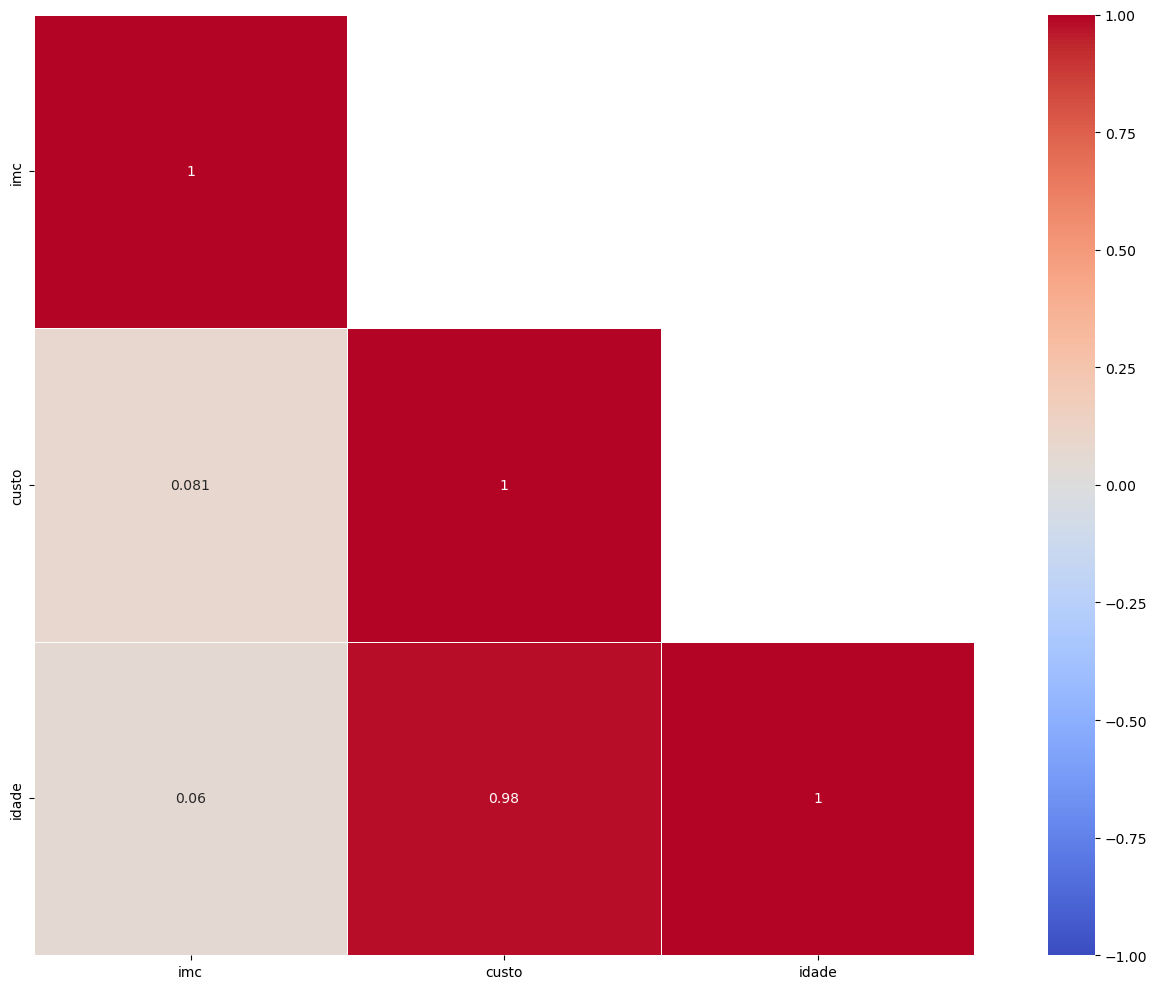

In [ ]:
# Criar uma máscara para ocultar os valores acima da diagonal
mask = np.triu(np.ones_like(cor_matriz, dtype=bool), k=1)

# Plotar a matriz de correlação com a máscara
plt.figure(figsize=(15,10))
sns.heatmap(cor_matriz, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, square=True, linewidths=.5)

# Ajustar rótulos e exibir o gráfico
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Teste de normalidade
# Selecionar os dados da variável que se deseja testar
valores = dados.custo.notnull()
# Executar o teste de Kolmogorov-Smirnov
resultado = stats.kstest(valores, 'norm' )
pvalue = resultado.pvalue
# Mostrar o resultado
print ( 'Kolmogorov-Smirnov p-value: ' , pvalue)

Kolmogorov-Smirnov p-value:  1.4350307337302788e-132


In [ ]:
# Calculando o coeficiente de correlação de Pearson e o p-valor
corr, p_value = stats.pearsonr(dados['idade'], dados['custo'])

# Imprimindo os resultados
print("Coeficiente de correlação:", corr)
print("p-valor:", p_value)

Coeficiente de correlação: 0.9784813541428415
p-valor: 2.4730510706984323e-114


In [ ]:
# Calculando o coeficiente de correlação de Pearson e o p-valor
corr, p_value = stats.pearsonr(dados['imc'], dados['custo'])

# Imprimindo os resultados
print("Coeficiente de correlação:", corr)
print("p-valor:", p_value)

Coeficiente de correlação: 0.08086087936237045
p-valor: 0.30036817694645823


In [ ]:
# Filtrar registros removendo os nulos nas duas colunas
dados2 = dados.dropna(how = 'any' , subset=[ 'idade','custo' ])
# Selecionar os dados das variáveis
X = dados2.idade.values
Y = dados2.custo.values
# Correlação de Spearman
# H0 não existe correlação entre as variáveis
r, p = stats.spearmanr(X, Y)
# Mostrar o resultado
print ( 'Teste de Correlação de Spearman' )
print ( 'Spearman r:', r.round(3))
print ( 'p-value:', p.round(3))


Teste de Correlação de Spearman
Spearman r: 0.998
p-value: 0.0


In [ ]:
# Usando o método .replace()
dados['sexo_cod'] = dados['sexo'].replace({'M': 0, 'F': 1})

C:\Users\lucia\AppData\Local\Temp\ipykernel_25720\2499582098.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['sexo_cod'] = dados['sexo'].replace({'M': 0, 'F': 1})


In [ ]:
print(dados)

     fumante    imc  custo  idade sexo  sexo_codificado  sexo_cod
0          0  34.10    100      0    F                1         1
1          0  30.40    102      2    F                1         1
2          0  30.14    108      3    F                1         1
3          0  33.66    110      3    F                1         1
4          0  37.29    112      5    F                1         1
..       ...    ...    ...    ...  ...              ...       ...
161        0  27.40   1647     87    M                0         0
162        0  37.10   1649     88    M                0         0
163        0  33.10   1649     88    M                0         0
164        0  33.70   1668     92    M                0         0
165        0  28.70   1668     90    M                0         0

[166 rows x 7 columns]


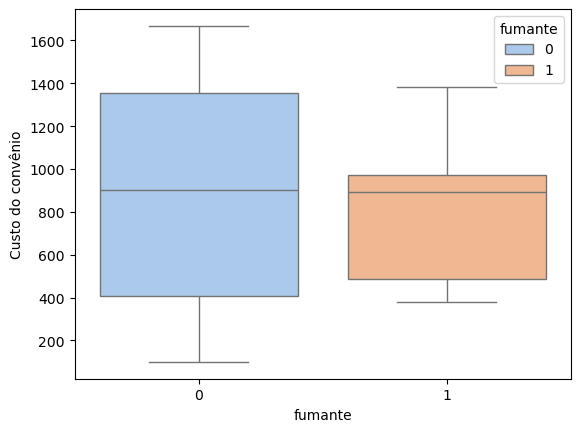

In [ ]:
# Boxplot mais elaborado que utiliza cores diferentes para cada categoria, adiciona uma legenda,
# um título, uma grade de fundo e a opção notch=True para adicionar intervalos de confiança nos quartis.

sns.boxplot(x='fumante', y='custo', hue='fumante', data=dados, palette='pastel', notch=False)

# Personalize rótulos e título
plt.ylabel('Custo do convênio')
#plt.xlabel('Fumante')
#plt.title('Boxplot da pressão arterial por diabetes')

# Exiba o gráfico
plt.show()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fumante          166 non-null    int64  
 1   imc              166 non-null    float64
 2   custo            166 non-null    int64  
 3   idade            166 non-null    int64  
 4   sexo             166 non-null    object 
 5   sexo_codificado  166 non-null    int64  
 6   sexo_cod         166 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
# Converter a variável 'sexo' e fumante para categórica
dados['sexo_cod'] = dados['sexo_cod'].astype('category')
dados['fumante'] = dados['fumante'].astype('category')

,fumante,imc,custo,idade,sexo,sexo_codificado,sexo_cod
0,0,34.10,100,0,F,1,1
1,0,30.40,102,2,F,1,1
2,0,30.14,108,3,F,1,1
3,0,33.66,110,3,F,1,1
4,0,37.29,112,5,F,1,1
...,...,...,...,...,...,...,...
161,0,27.40,1647,87,M,0,0
162,0,37.10,1649,88,M,0,0
163,0,33.10,1649,88,M,0,0
164,0,33.70,1668,92,M,0,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   fumante          166 non-null    category
 1   imc              166 non-null    float64 
 2   custo            166 non-null    int64   
 3   idade            166 non-null    int64   
 4   sexo             166 non-null    object  
 5   sexo_codificado  166 non-null    int64   
 6   sexo_cod         166 non-null    category
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 7.2+ KB


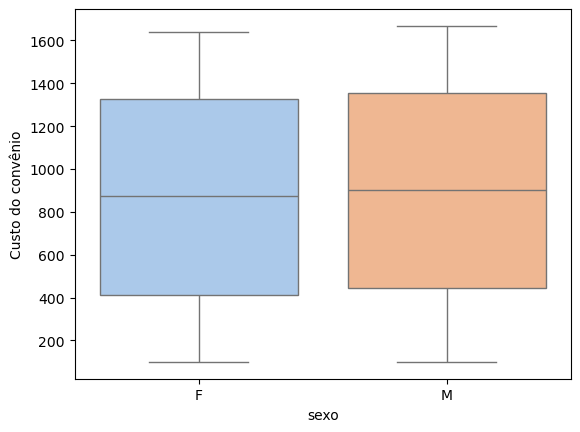

In [ ]:
# Boxplot mais elaborado que utiliza cores diferentes para cada categoria, adiciona uma legenda,
# um título, uma grade de fundo e a opção notch=True para adicionar intervalos de confiança nos quartis.

sns.boxplot(x='sexo', y='custo', hue='sexo', data=dados, palette='pastel', notch=False)

# Personalize rótulos e título
plt.ylabel('Custo do convênio')
#plt.xlabel('Sexo')
#plt.title('Boxplot da pressão arterial por diabetes')

# Exiba o gráfico
plt.show()

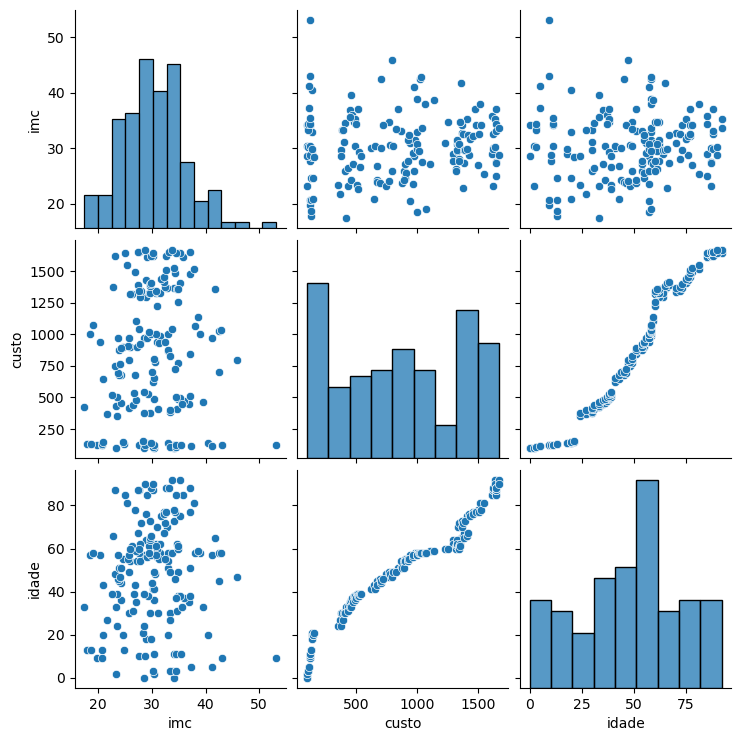

In [ ]:
sns.pairplot(dados_sel);

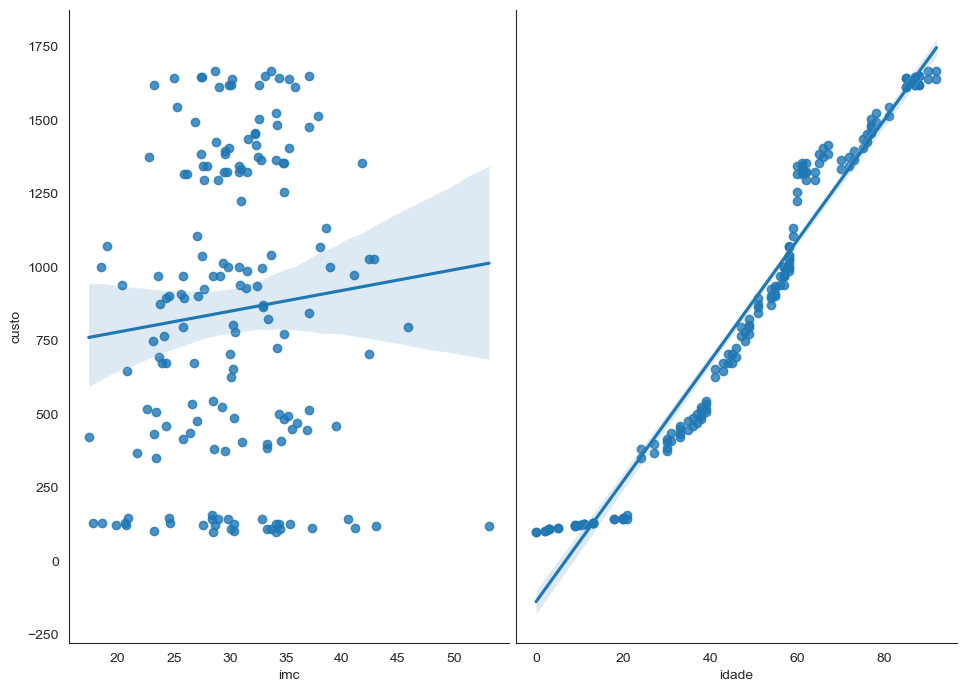

In [ ]:
# Apresentar gráfico mostrando as relações entre as variáveis independentes e a dependente (custo).
sns.set_style("white")
sns.pairplot(dados, x_vars=['imc','idade'], y_vars='custo',
             height=7, aspect=0.7, kind='reg');

In [ ]:
dados.columns

Index(['fumante', 'imc', 'custo', 'idade', 'sexo', 'sexo_codificado',
       'sexo_cod'],
      dtype='object')

### Regressão Linear simples e múltipla


In [ ]:
# Ajustando o modelo de regressão linear
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

modelo = ols('custo ~ sexo + fumante + imc + idade',data=dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  custo   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     932.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.57e-110
Time:                        20:59:47   Log-Likelihood:                -1006.5
No. Observations:                 166   AIC:                             2023.
Df Residuals:                     161   BIC:                             2038.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -195.4858     45.726     -4.275   

In [ ]:
### Fator de inflação da variância
 # Calcula o fator de inflação da variância para as variávis explicativas do modelo (VIF)
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print(vif)

[31.14172242016882, 1.0283241853446063, 1.0156850112829638, 1.0205405706244193, 1.0038212502274264]


In [ ]:
# Diagnóstico do modelo
# Análise dos resíduos

from scipy.stats import f

# valores preditos de E(Y)
ypred=res.fittedvalues

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,k) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Index([], dtype='int64') Index([], dtype='int64')


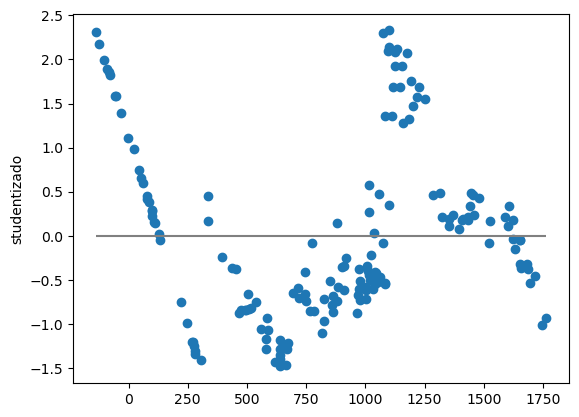

In [ ]:
plt.scatter(ypred, res_stud)
plt.ylabel('studentizado')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
print(dados.index[res_stud<-3],dados.index[res_stud>3]) # identifica as observações mais críticas

Index([], dtype='int64')


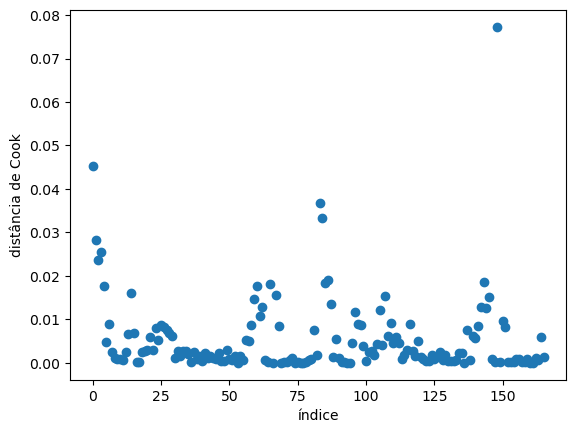

In [ ]:
plt.scatter(dados.index, cook)
plt.ylabel('distância de Cook')
plt.xlabel('índice')
print(dados.index[cook>f.ppf(.5, 5, 126)]) # valores que estão acima do percentil 50 de uma distribuição F(p,n-p)

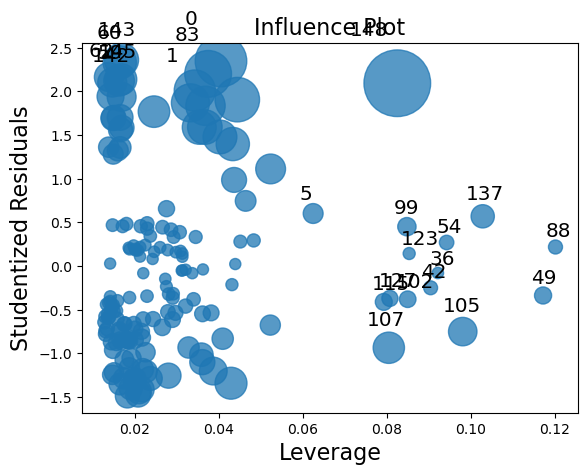

In [ ]:
import statsmodels.api as sm

# Gráfico dos resíduos
fig = sm.graphics.influence_plot(res)

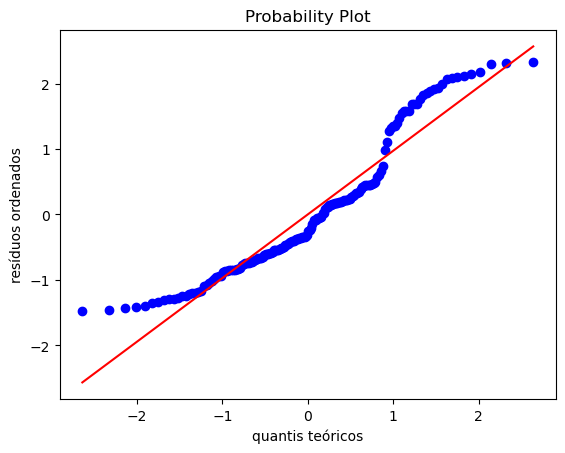

Index([], dtype='int64') Index([0, 59, 60, 62, 83, 142, 143, 145, 148], dtype='int64')


In [ ]:
from scipy import stats

# Verificando a suposição de distribuição Normal dos resíduos
stats.probplot(res_stud, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()
print(dados.index[res_stud<-2],dados.index[res_stud>2])